# Exploratory Data Analysis

## Import packages

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [92]:
client_df = pd.read_csv('/kaggle/input/bcg-forage/client_data.csv')
price_df = pd.read_csv('/kaggle/input/bcg-forage/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [93]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [94]:
price_df.head(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


---

# CLIENT DATA
## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [95]:
client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']] = client_df[['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']].apply(pd.to_datetime, errors='coerce')

In [96]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [97]:
client_df.describe(include='all', datetime_is_numeric=True)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
count,14606,14606,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,...,14606,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606,14606.000000,14606.000000
unique,14606,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,NaN,NaN,NaN,NaN,NaN,NaN,lxidpiddsbxsbosboudacockeimpuepw,NaN,NaN
freq,1,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11955,NaN,NaN,NaN,NaN,NaN,NaN,7097,NaN,NaN
mean,NaN,NaN,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,...,NaN,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,NaN,18.135136,0.097152
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,...,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,3.300000,0.000000
25%,NaN,NaN,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,...,NaN,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,NaN,12.500000,0.000000
50%,NaN,NaN,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,...,NaN,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,NaN,13.856000,0.000000
75%,NaN,NaN,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,...,NaN,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,NaN,19.172500,0.000000
max,NaN,NaN,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,...,NaN,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,NaN,320.000000,1.000000


---

# Data visualization

Here we examine the patterns in the data to look out for relevant relationships amongst variables.

From the plot below, the churn rate at PowerCo is 9.7%

In [98]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

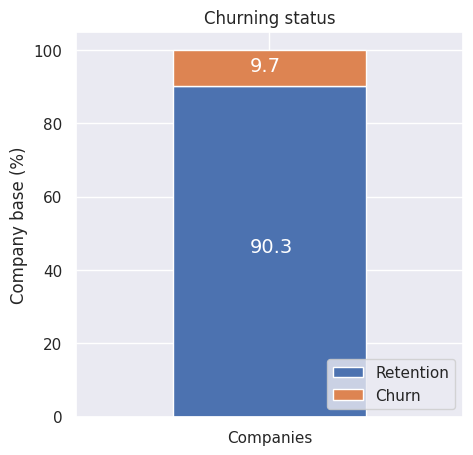

In [99]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

## **Inspecting Categorical Variables and Churn**

In [100]:
df=client_df.copy()
df["cons_12m"]=df["cons_12m"]/1e9
df["cons_gas_12m"]=df["cons_gas_12m"]/1e6
df["cons_last_month"]=df["cons_last_month"]/1e6
df["forecast_cons_12m"]=df["forecast_cons_12m"]/1e6

In [101]:
client_df["channel_sales"].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [102]:
client_df["origin_up"].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

# **CLIENT FEATURES AND CHURN**

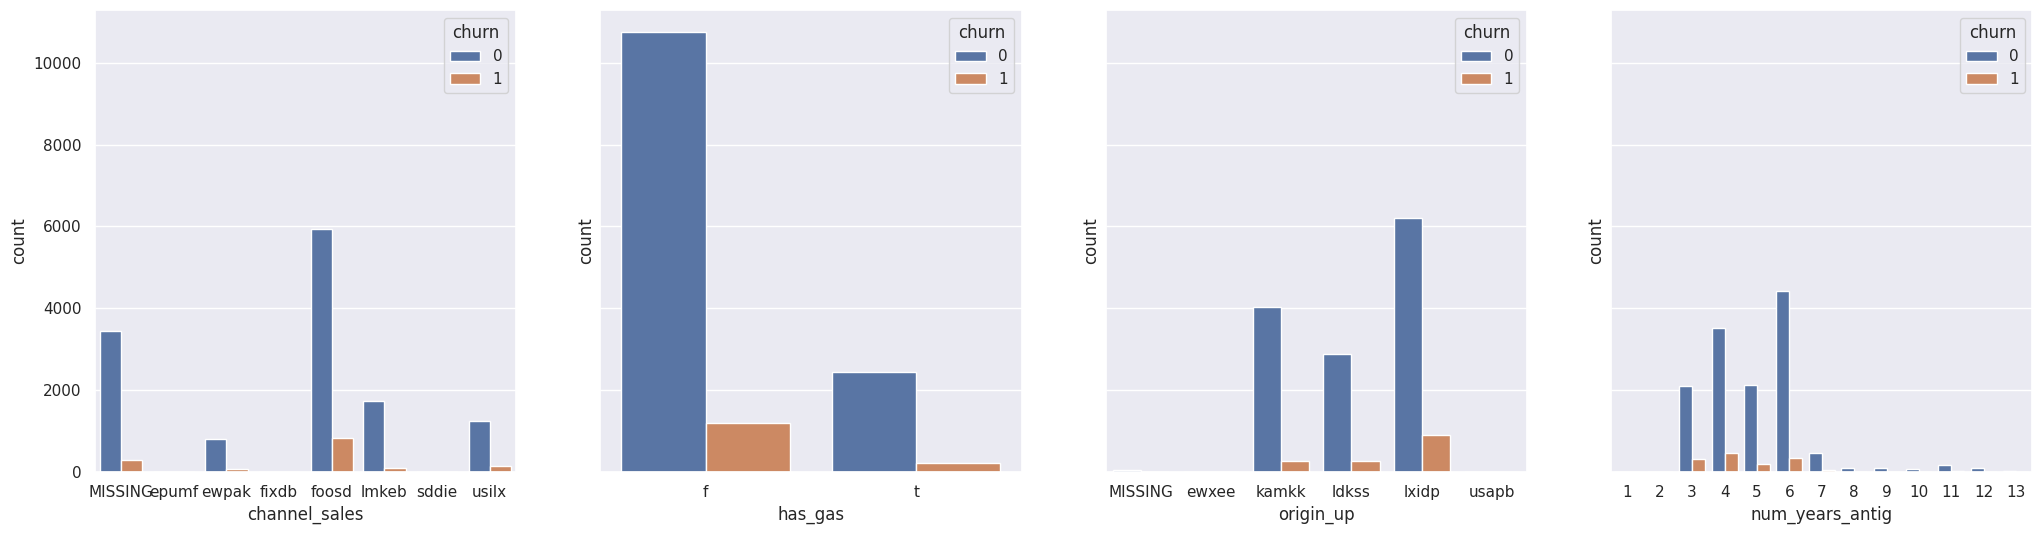

In [103]:

for column in df.columns:
    if (df[column].dtype=="object") & (df[column].nunique() < 10):
        df[column]=df[column].astype("category")
        for name in df[column].unique():
            if (len(name)>5) & (name!="MISSING"):  
                df[column]=df[column].cat.rename_categories({name: name[:5]})
                
                            
_, axes = plt.subplots(1, 4, sharey=True, figsize=(25, 6))
sns.countplot(x="channel_sales", hue="churn", data=df, ax=axes[0])
sns.countplot(x="has_gas", hue="churn", data=df, ax=axes[1])
sns.countplot(x="origin_up", hue="churn", data=df, ax=axes[2])
sns.countplot(x="num_years_antig", hue="churn", data=df,ax=axes[3]);


When looking at Channel sales, The channel with the highest total churn is "foosd". The name has been limited to the first five letters. However, given that most of the client base comes from this channel, the propotional values make sense. 

On the other hand, It is clear that, although for customers who consume both gas and electricity from PowerCo the total number of churn is lower compared to those who do not, the proportional difference says otherwise which makes it difficult to say there is any relationship between churn and consumption choice.

When looking at the code of the electricity campaign the customer first subscribed to, the code with the highest churn is 'lxidp'. However, proportionally, 'idkss' appears to have churned a lot more.

Lastly, customers with 3 to 6 years of Antiquity appear to have churned a lot more as majority of the consumers fall withnin these years of antiquity.

In [104]:
def plot_consumption(cons_cat,lim,df, category):
    for col, l in zip(cons_cat,lim):
        g=sns.catplot(
        x="churn",
        y=col,
        col=category,
        data=df,
        kind="bar",
        col_wrap=8,
        height=4,
        aspect=0.6,estimator='sum'
        )
        #g.set(ylim=(0, l))
        if col=="cons_12m":
            g.set_axis_labels("Churn", "Elec. Con_12months (Billion)")
        elif col=="cons_last_month":
            g.set_axis_labels("Churn", "Elec. cons_last_month (Million)")
        else: 
            g.set_axis_labels("Churn", "Gas Con_12months (Million)")
            
cons_rate=["cons_12m","cons_gas_12m","cons_last_month"]
lim=[20000,300000,200000]

# **CONSUMPTION AND CHURN**

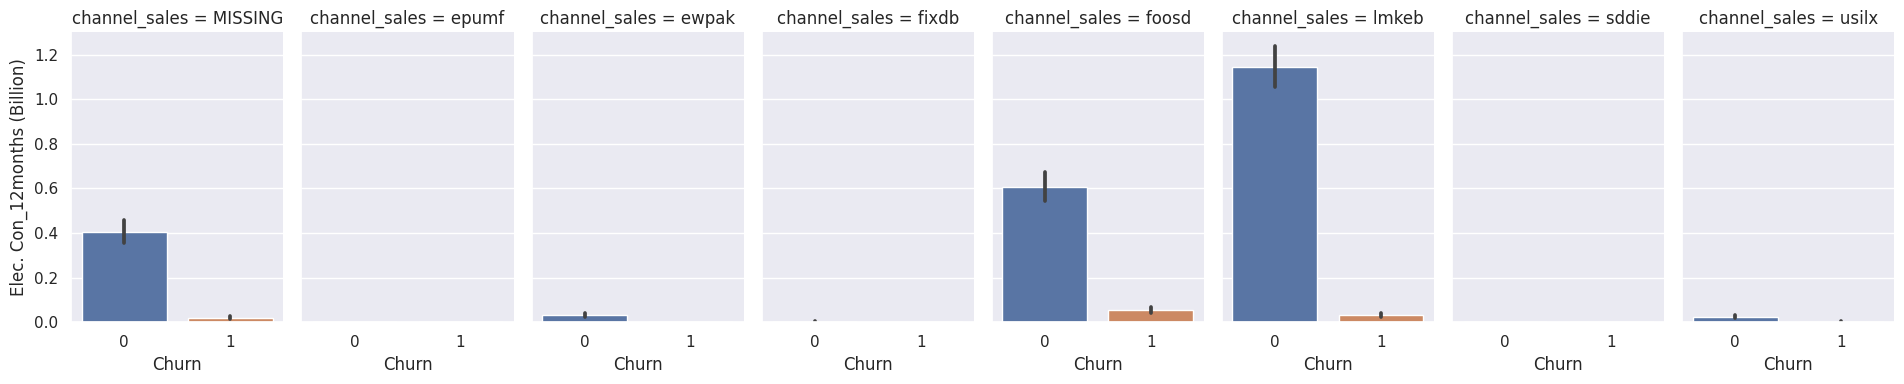

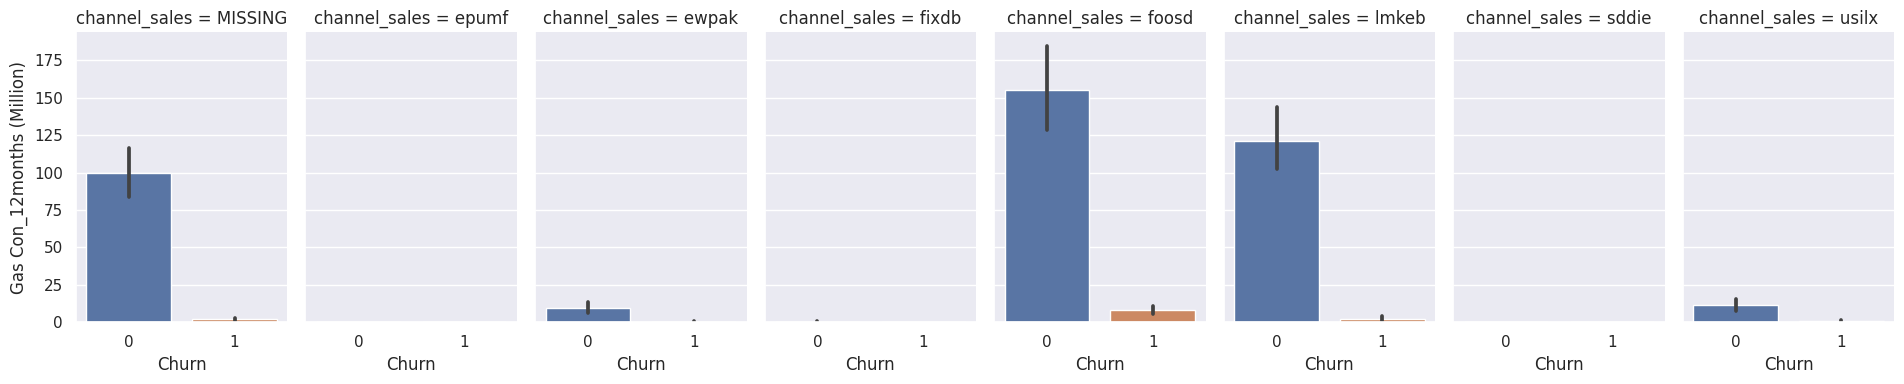

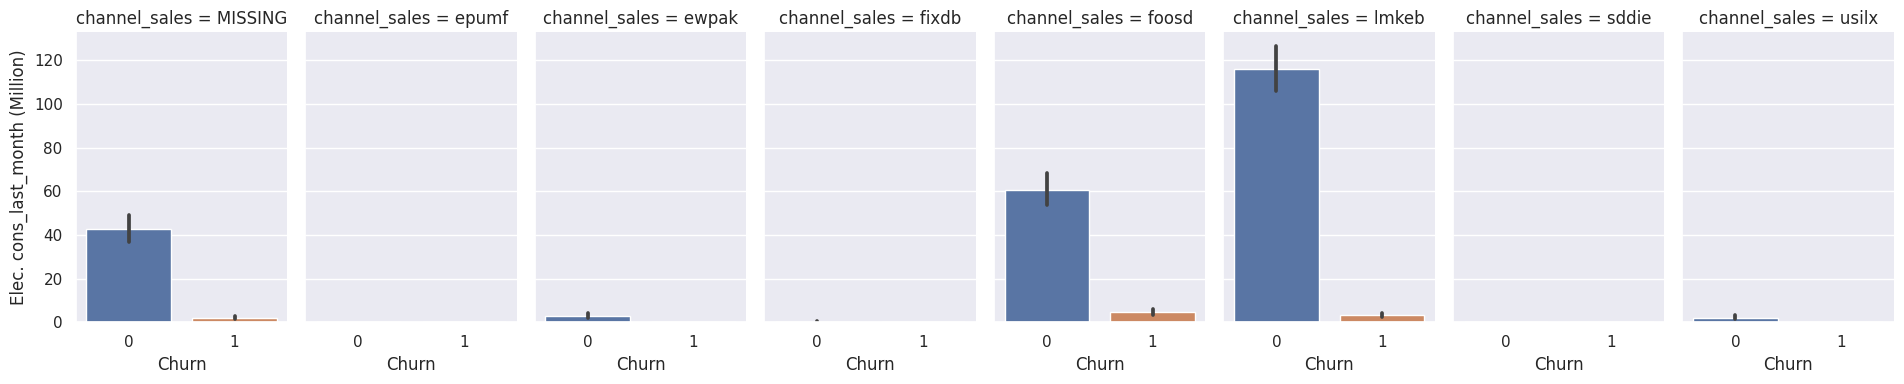

In [105]:
plot_consumption(cons_cat=cons_rate,lim=lim,df=df,category="channel_sales")

The churn of consumption through channel 'Foosd' appears to have experience more churn accross electricity and Gas consumption in the past 12 months. The is also proportionally higher compared to the other channels in the previous months consumption of electricity.

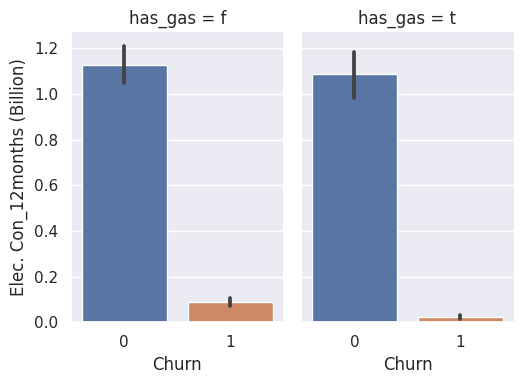

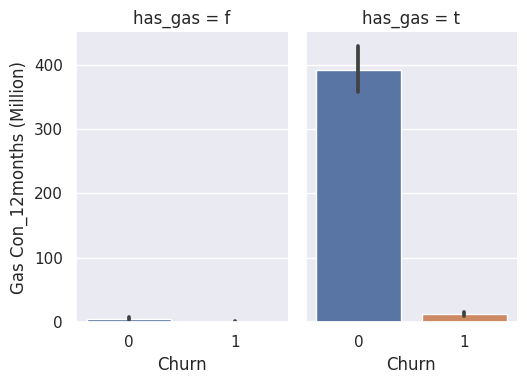

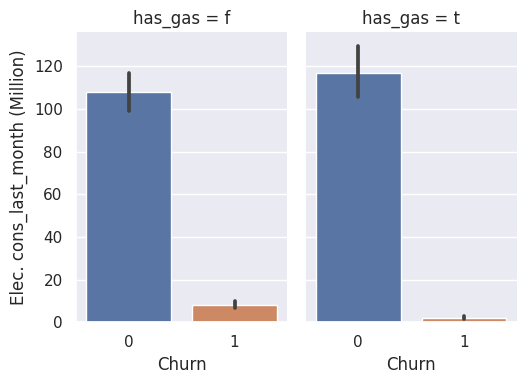

In [106]:
plot_consumption(cons_cat=cons_rate,lim=lim,df=df,category="has_gas")

Customers who do not purchase gas have higher churn rates over the past 12 months compared to those who do purchase gas.

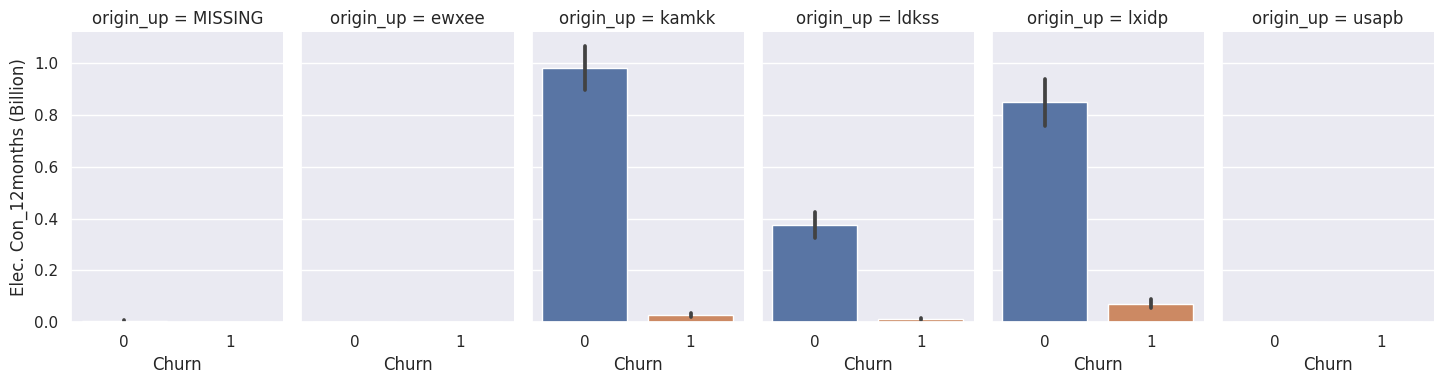

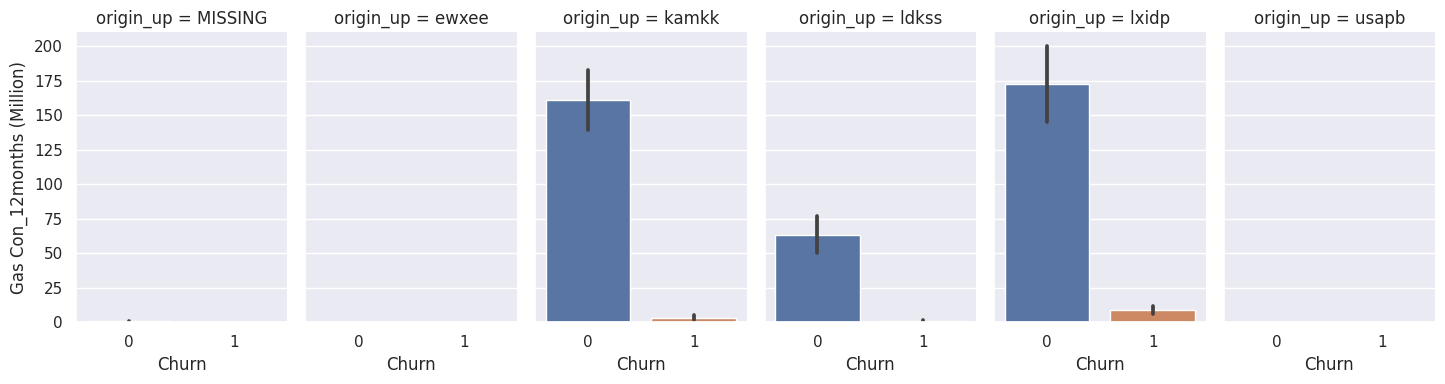

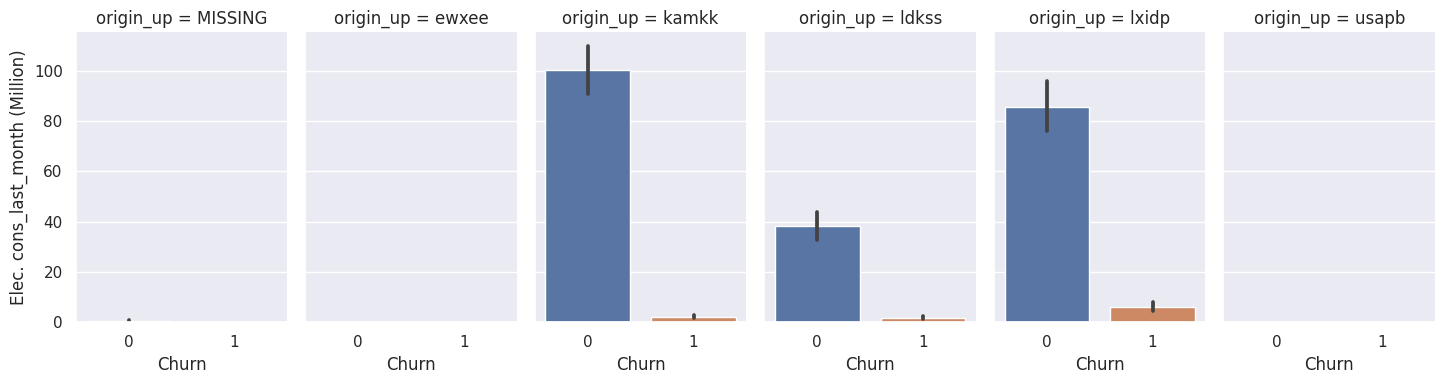

In [107]:
plot_consumption(cons_cat=cons_rate,lim=lim,df=df,category="origin_up")

'lxidp' as the code of the electricity campaign the customer first subscribed to appears to show a lot more churn compared to the other campaigns accross Gas and Electricity within the past 12 months. This also shows in the proportional differences.

# **DATE AND CHURN**

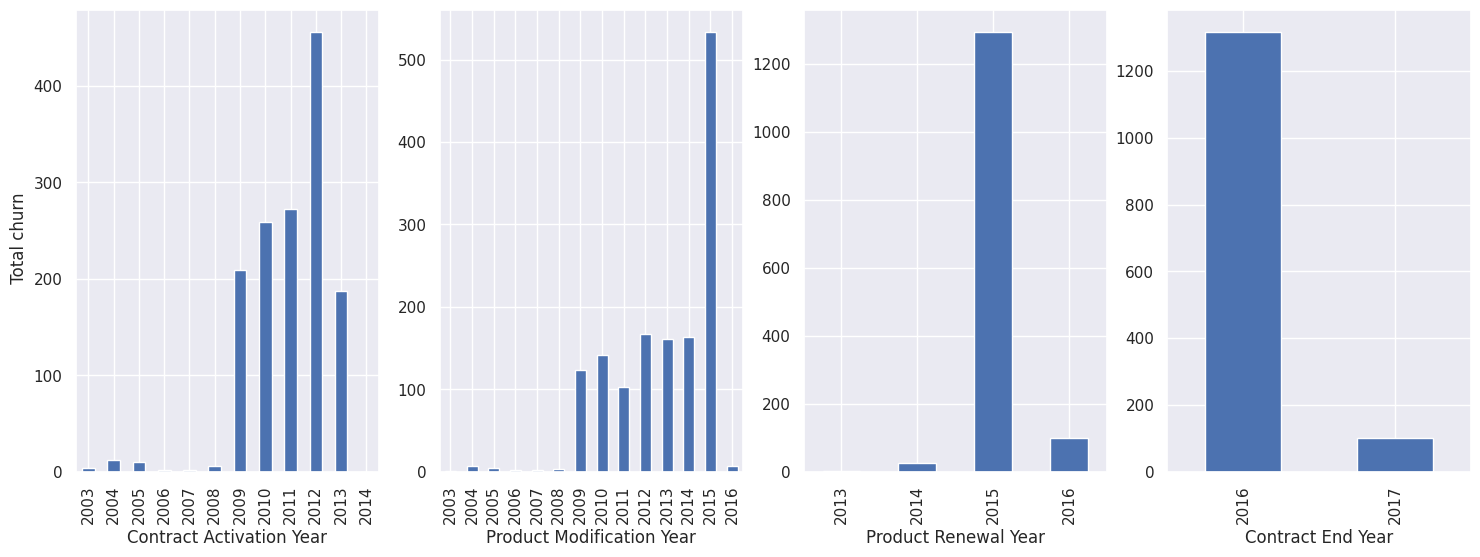

In [108]:
group={"date_activ":"Contract Activation Year", "date_modif_prod": "Product Modification Year",
       "date_renewal":"Product Renewal Year", "date_end": "Contract End Year"}

def plot_barline(group_cat,df,by, date=True):
    i=0
    plt.figure(figsize=(18,6))
   
    for k,v in zip(group_cat.keys(),group_cat.values()):
            i+=1
            if date==True:
                plt.subplot(1,4,i)
                df.groupby(df[k].dt.year)[by].sum().plot(kind="bar")
                plt.xlabel(v)
                if i==1:
                    plt.ylabel(f" Total {by}")
            else:
                plt.figure(figsize=(20,12))
                plt.subplot(4,1,i)
                df.groupby(round(df[by]))[k].sum().plot(kind="line")
                plt.xlabel(" ")
                plt.ylabel(v)
                if i==4:
                    plt.xlabel(f"Antiquity of the Client (in number of years)");

plot_barline(group_cat=group,df=df,by="churn", date=True)


The year with the highest contract activations is 2012. A lot of product modification and Renewal also occured in 2015. Lastly, A lot of contracts ended in 2016.

# **ANTIQUITY OF CLIENT**

<Figure size 1800x600 with 0 Axes>

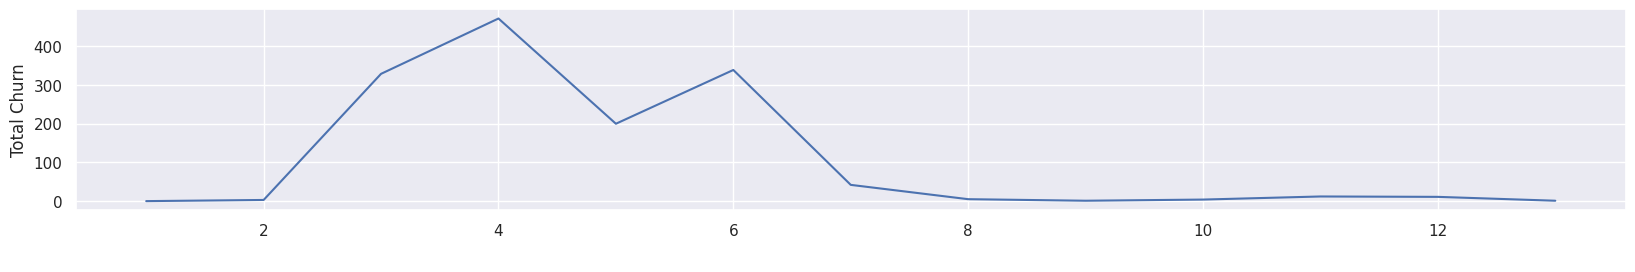

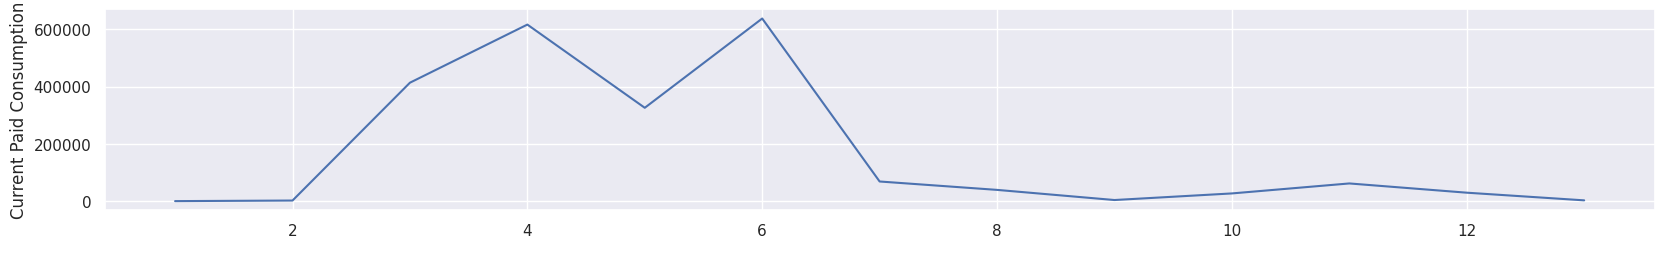

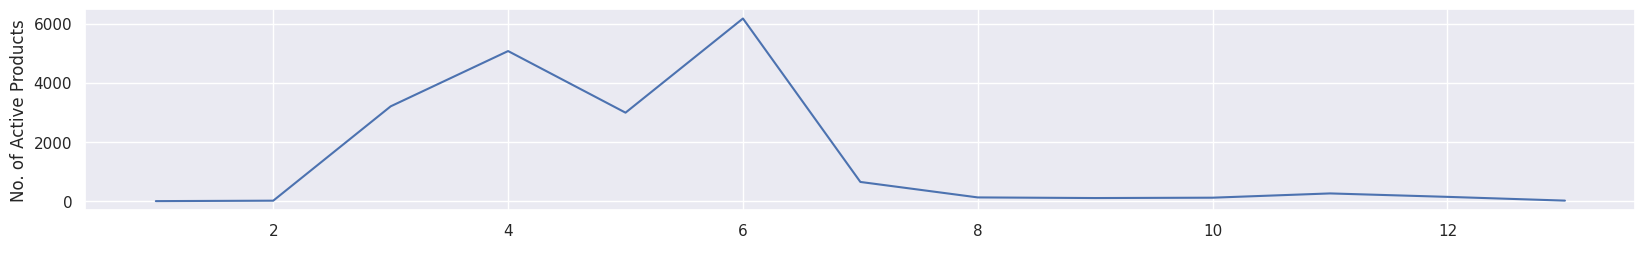

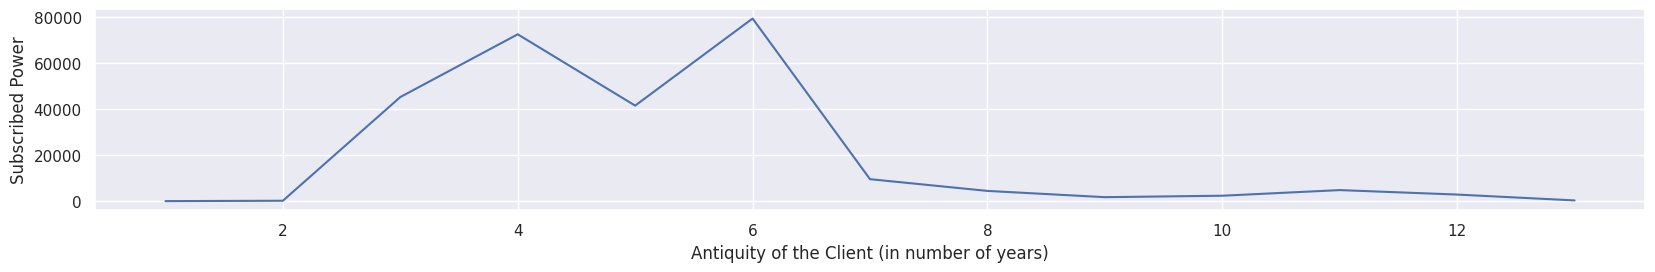

In [109]:
group1={"churn": "Total Churn", "imp_cons": "Current Paid Consumption", "nb_prod_act": "No. of Active Products", "pow_max": "Subscribed Power"}
plot_barline(group_cat=group1,df=df,by="num_years_antig", date=False);

Majority of the customers lies within 2 to 7 years of Antiquity. Therefore, consumption and churn lies within these years of antiquity categories of clients.

# **PAST AND FUTURE CONSUMPTION**

In [110]:
df["forecast_cons_year"]=df["forecast_cons_year"]/1e6

Total consumption churned for the past 12 months is 0.111905857 Billion
Total Forecast consumption churned for the next 12 months is 1.950333 Million


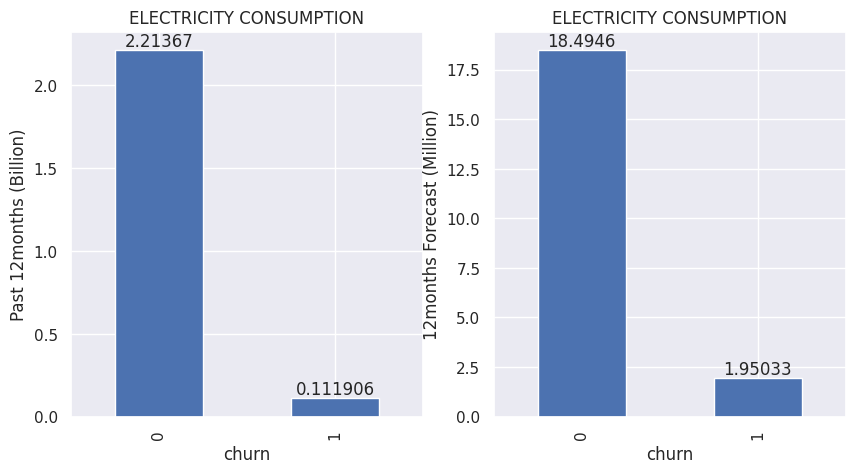

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ax= df.groupby(df["churn"])["cons_12m"].sum().plot(kind="bar")
for n in ax.containers:
    ax.bar_label(n)
plt.ylabel("Past 12months (Billion)")
plt.title("ELECTRICITY CONSUMPTION")
churn_amount=df.groupby(df["churn"])["cons_12m"].sum()[1]    
print(f"Total consumption churned for the past 12 months is {churn_amount} Billion")

plt.subplot(1,2,2)
ax= df.groupby(df["churn"])["forecast_cons_year"].sum().plot(kind="bar")
for n in ax.containers:
    ax.bar_label(n)
plt.ylabel("12months Forecast (Million)")
plt.title("ELECTRICITY CONSUMPTION");
churn_amount=df.groupby(df["churn"])["forecast_cons_year"].sum()[1]    
print(f"Total Forecast consumption churned for the next 12 months is {churn_amount} Million")

Proportionally, A lot more Electricity Consumption churn has been forecasted to occur within the next 12 months proportionally. However, the consumption of electricity churn for the past 12 months is much higher in value compared to the forecasted value of consumption churn.

**Forecast Consumption and Discount**

Majority of the consumers have no discount. The forecast data also has outliers when the mean, 75th percentile and the Max values are compared. Also, the standard deviations are too huge. This may be a true value or an error and needs further clarification to ensure the validity of the data.

In [112]:
print("forecasted electricity consumption for the next calendar year")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])['forecast_cons_year'].describe())
print(" ")
print("forecasted electricity consumption for next 2 months")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])['forecast_cons_12m'].describe())
print(" ")
print("forecasted value of current discount")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])['forecast_discount_energy'].describe())
print(" ")
print("forecasted bill of meter rental for the next 12 months")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])["forecast_meter_rent_12m"].describe())


forecasted electricity consumption for the next calendar year
-----------------------------------
         count         mean          std  min  25%    50%     75%       max
churn                                                                      
0      13187.0  1402.487601  3302.114000  0.0  0.0  312.0  1750.5  175375.0
1       1419.0  1374.441860  2691.815516  0.0  0.0  326.0  1688.5   37891.0
 
forecasted electricity consumption for next 2 months
-----------------------------------
         count         mean          std  min      25%      50%      75%  \
churn                                                                      
0      13187.0  1858.473333  2344.331993  0.0  494.430  1108.55  2389.74   
1       1419.0  1962.861938  2756.320036  0.0  503.975  1152.35  2525.24   

            max  
churn            
0      82902.83  
1      61357.17  
 
forecasted value of current discount
-----------------------------------
         count      mean       std  min  25%  50%  75% 

**Margin on Power Subscription**

In [113]:
print("Gross Margin on Power Subscription")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])["margin_gross_pow_ele"].describe())
print(" ")
print("Net Margin on Power Subscription")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])["margin_net_pow_ele"].describe())


Gross Margin on Power Subscription
-----------------------------------
         count       mean        std  min    25%    50%    75%     max
churn                                                                 
0      13187.0  23.929863  19.359021  0.0  13.86  21.48  29.64  374.64
1       1419.0  30.468682  26.306684  0.0  17.13  26.04  34.68  299.64
 
Net Margin on Power Subscription
-----------------------------------
         count       mean        std  min     25%    50%    75%     max
churn                                                                  
0      13187.0  23.926979  19.357893  0.0  13.835  21.48  29.64  374.64
1       1419.0  30.468682  26.306684  0.0  17.130  26.04  34.68  299.64


From above, it is clear that 'Gross Margin on Power Subscription' and "Net Margin on Power Subscription" have the same figures.

# Forecasted Prices

In [114]:
print("forecasted energy price for 1st period (off peak)")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])['forecast_price_energy_off_peak'].describe())
print(" ")
print("forecasted energy price for 2nd period (peak)")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])['forecast_price_energy_peak'].describe())
print(" ")
print("forecasted power price for 1st period (off peak)")
print("-----------------------------------")
print(client_df.groupby(client_df["churn"])['forecast_price_pow_off_peak'].describe())

forecasted energy price for 1st period (off peak)
-----------------------------------
         count      mean       std       min       25%       50%       75%  \
churn                                                                        
0      13187.0  0.137371  0.024705  0.000000  0.116340  0.143227  0.146348   
1       1419.0  0.136470  0.023836  0.092453  0.115744  0.142819  0.145789   

            max  
churn            
0      0.273963  
1      0.273963  
 
forecasted energy price for 2nd period (peak)
-----------------------------------
         count      mean       std  min  25%       50%       75%       max
churn                                                                     
0      13187.0  0.050019  0.048950  0.0  0.0  0.083909  0.098837  0.195975
1       1419.0  0.054873  0.049634  0.0  0.0  0.086803  0.099545  0.168092
 
forecasted power price for 1st period (off peak)
-----------------------------------
         count       mean       std        min        25% 

# **DISTRIBUTIONS**

From below, most of the variables in the data are skewed and would therefore need to be tuned before modelling.

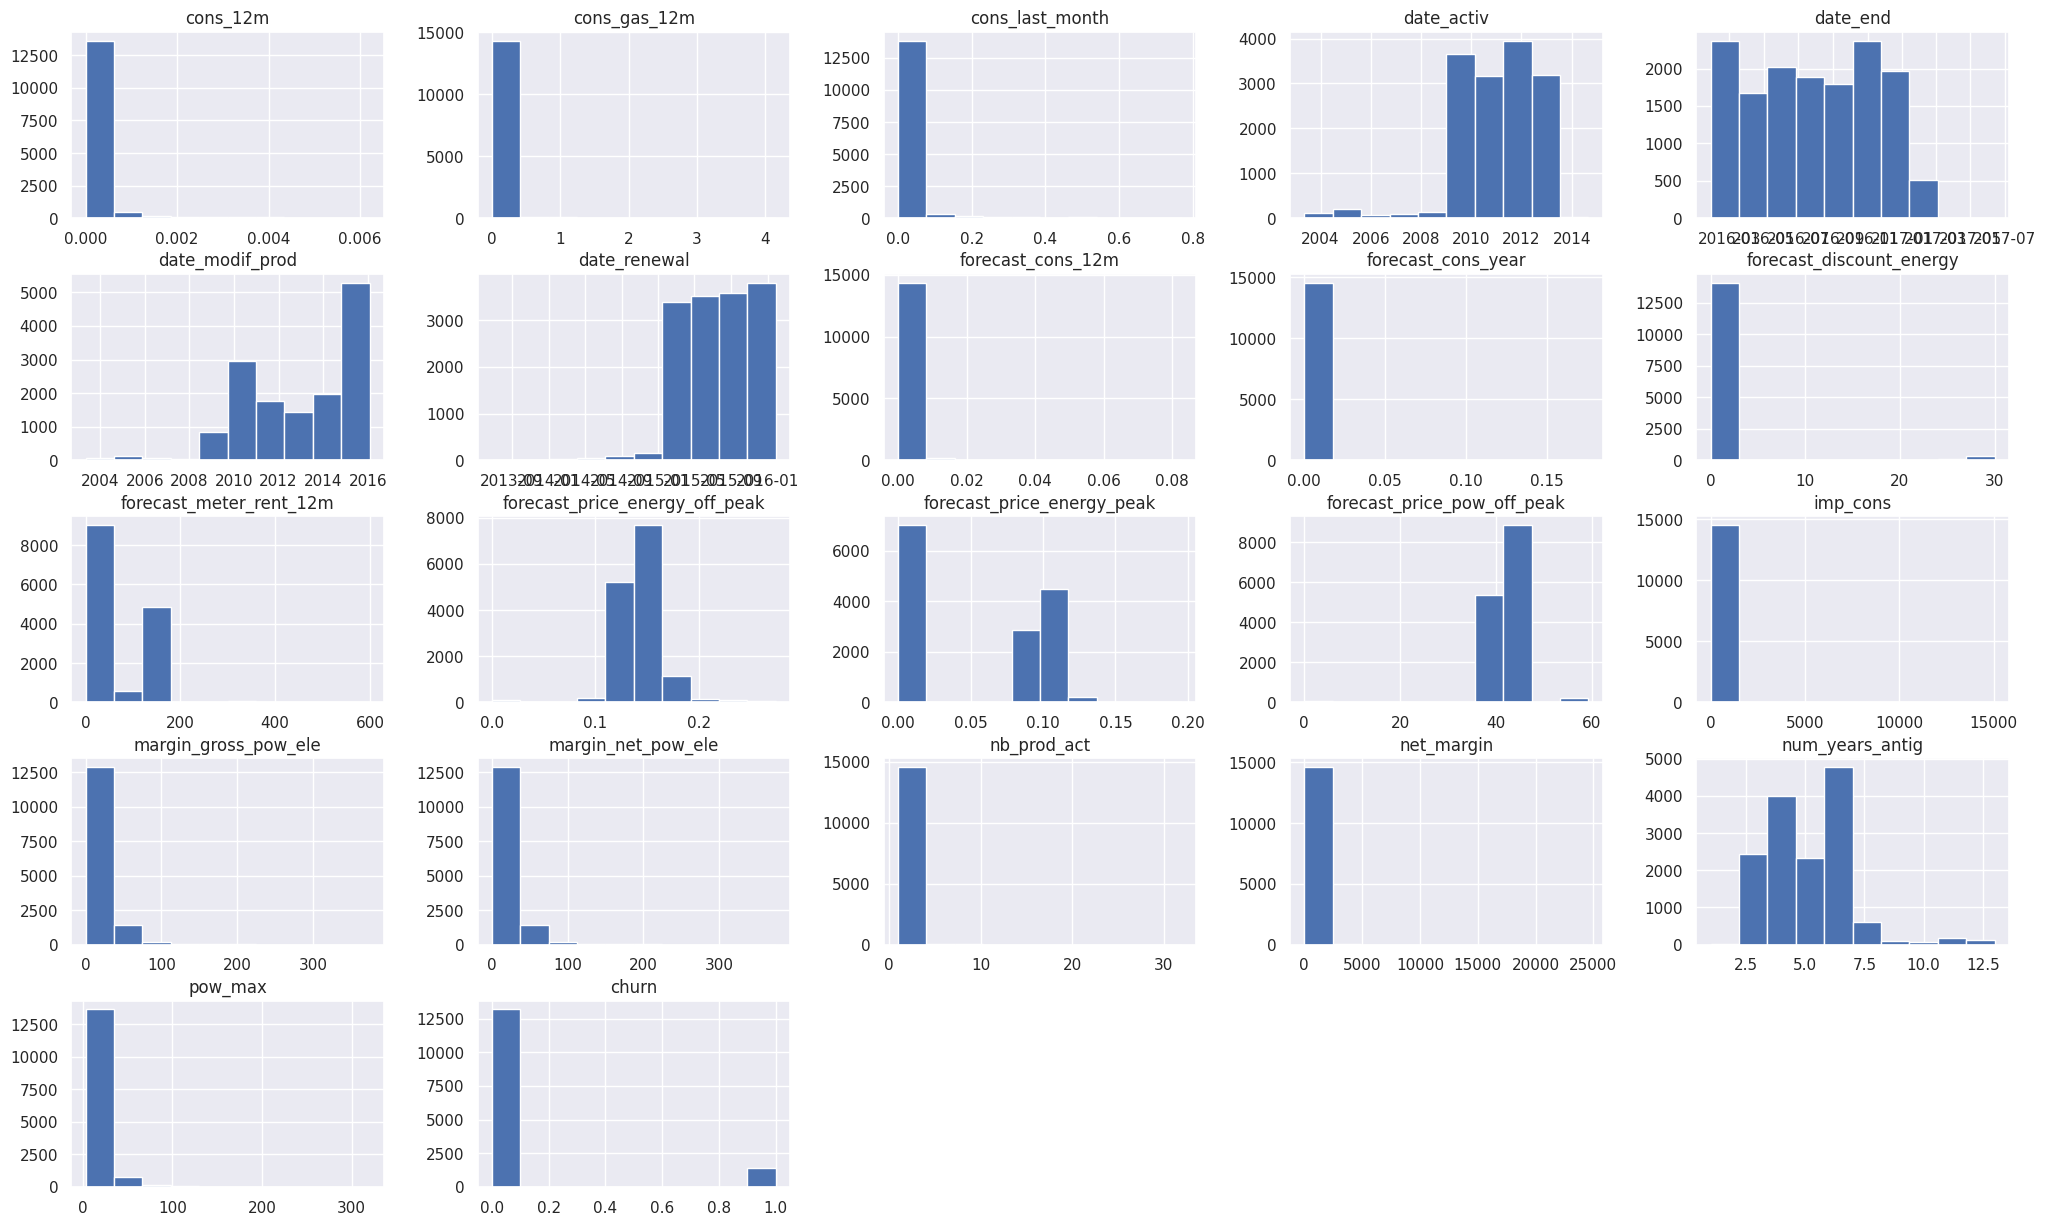

In [115]:
df.hist(figsize=(25,15));

# PRICE DATA

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [126]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [117]:
price_df.describe(include="all")

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
unique,16096,12,NaN,NaN,NaN,NaN,NaN,NaN
top,038af19179925da21a25619c5a24b745,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,12,16094,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,NaN,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,NaN,NaN,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,NaN,NaN,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389


In [118]:
price_df["price_date"] = price_df["price_date"].apply(pd.to_datetime, errors='coerce')


## Data visualization

Here we examine the patterns in the data to look out for relevant relationships amongst variables.

From the plot, it is difficult to establish any patterns in the price data. Also, the data appears to have a lot of outliers. However, we see that the variable prices fall between 0 to 0.144 while the fixed prices fall between 0 to 45.5 with valleys occuring in June. 

**PRICE SENSITIVITY**

Price sensitivity measures the changes in consumption resulting from changes in prices. To calculate this, we will find the change in consumption and divide by change in price for the various customers. This will be done with the variable prices and the fixed prices separately.

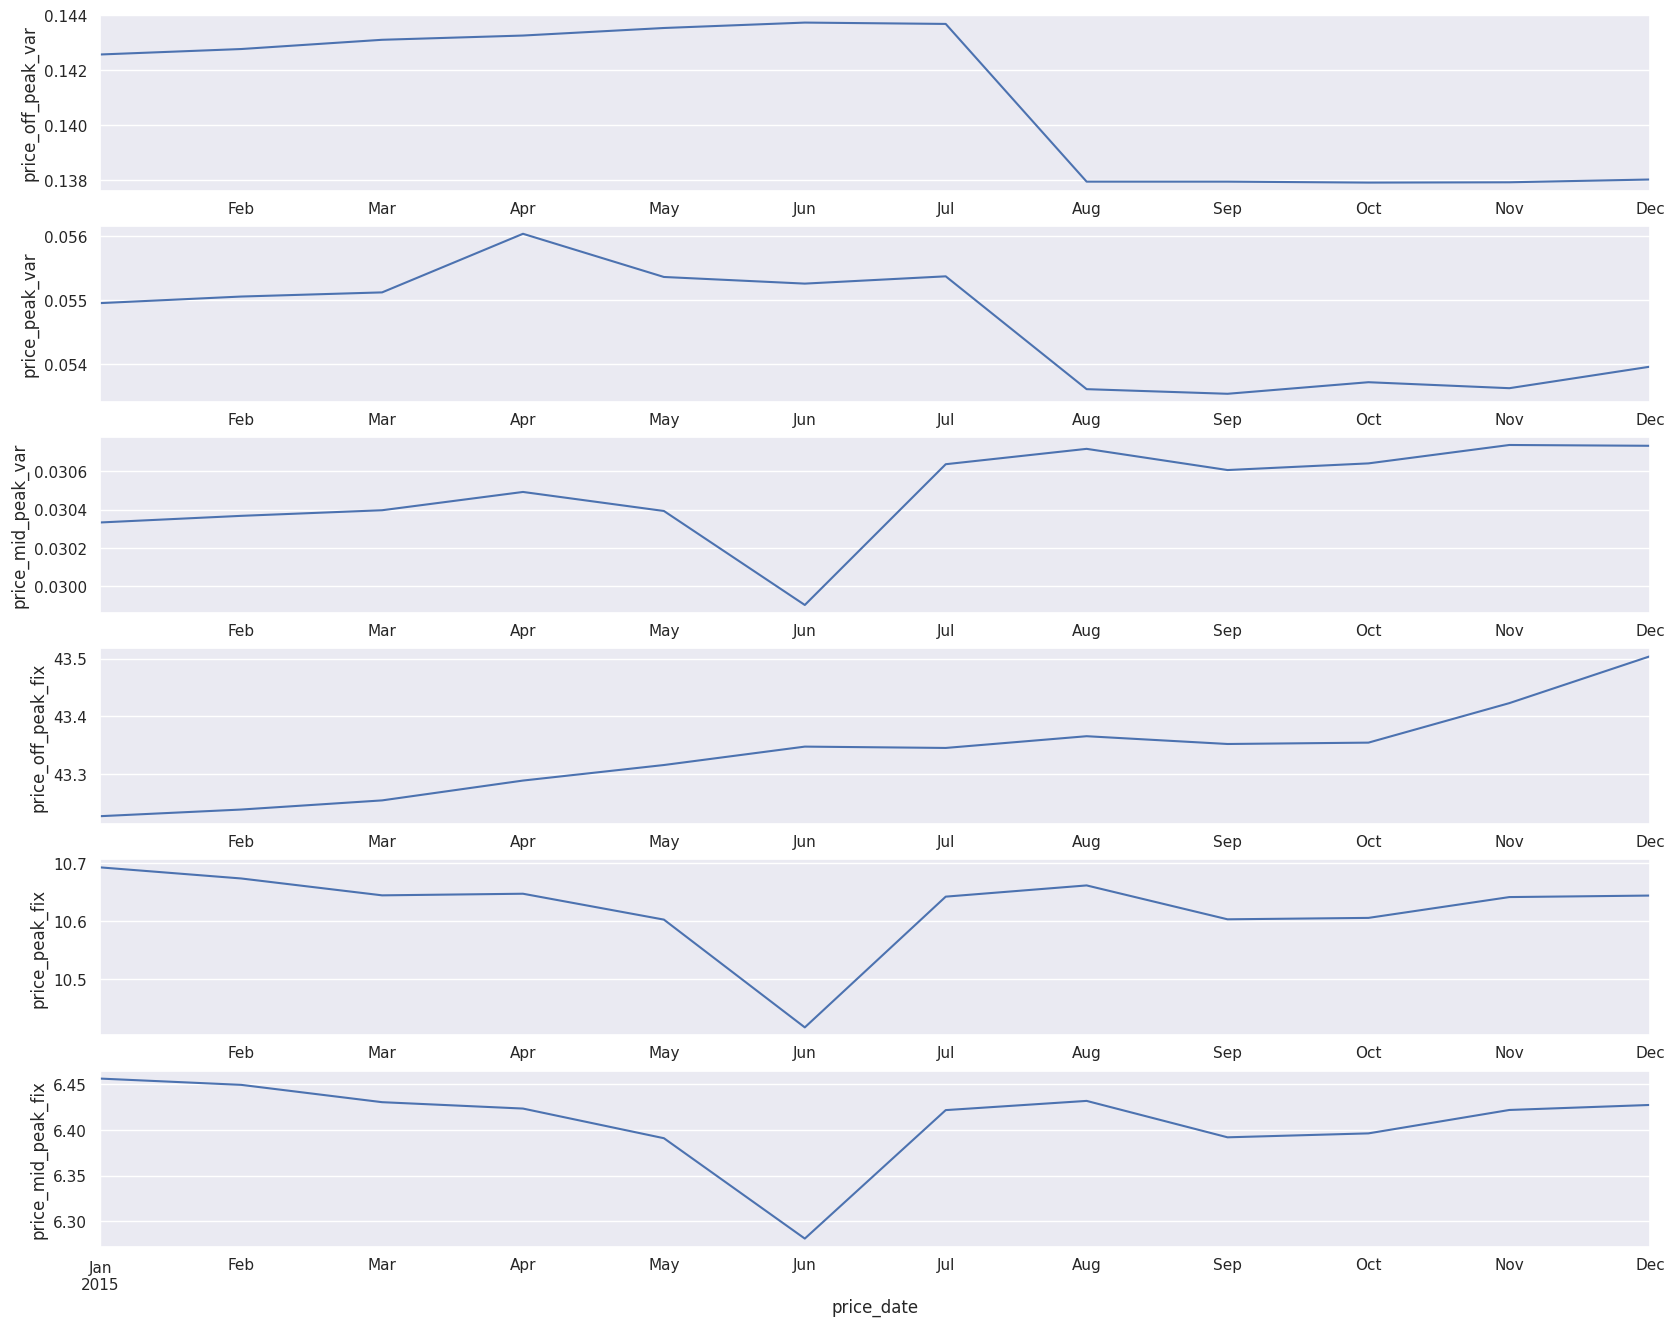

In [119]:
i=0
plt.figure(figsize=(20,16))
for col in price_df.columns[2:]:
    i+=1
    plt.subplot(6,1,i)
    price_df.groupby(price_df["price_date"])[col].mean().plot()
    plt.ylabel(col)
    if i<6:
        plt.xticks([])
        plt.xlabel("")
        

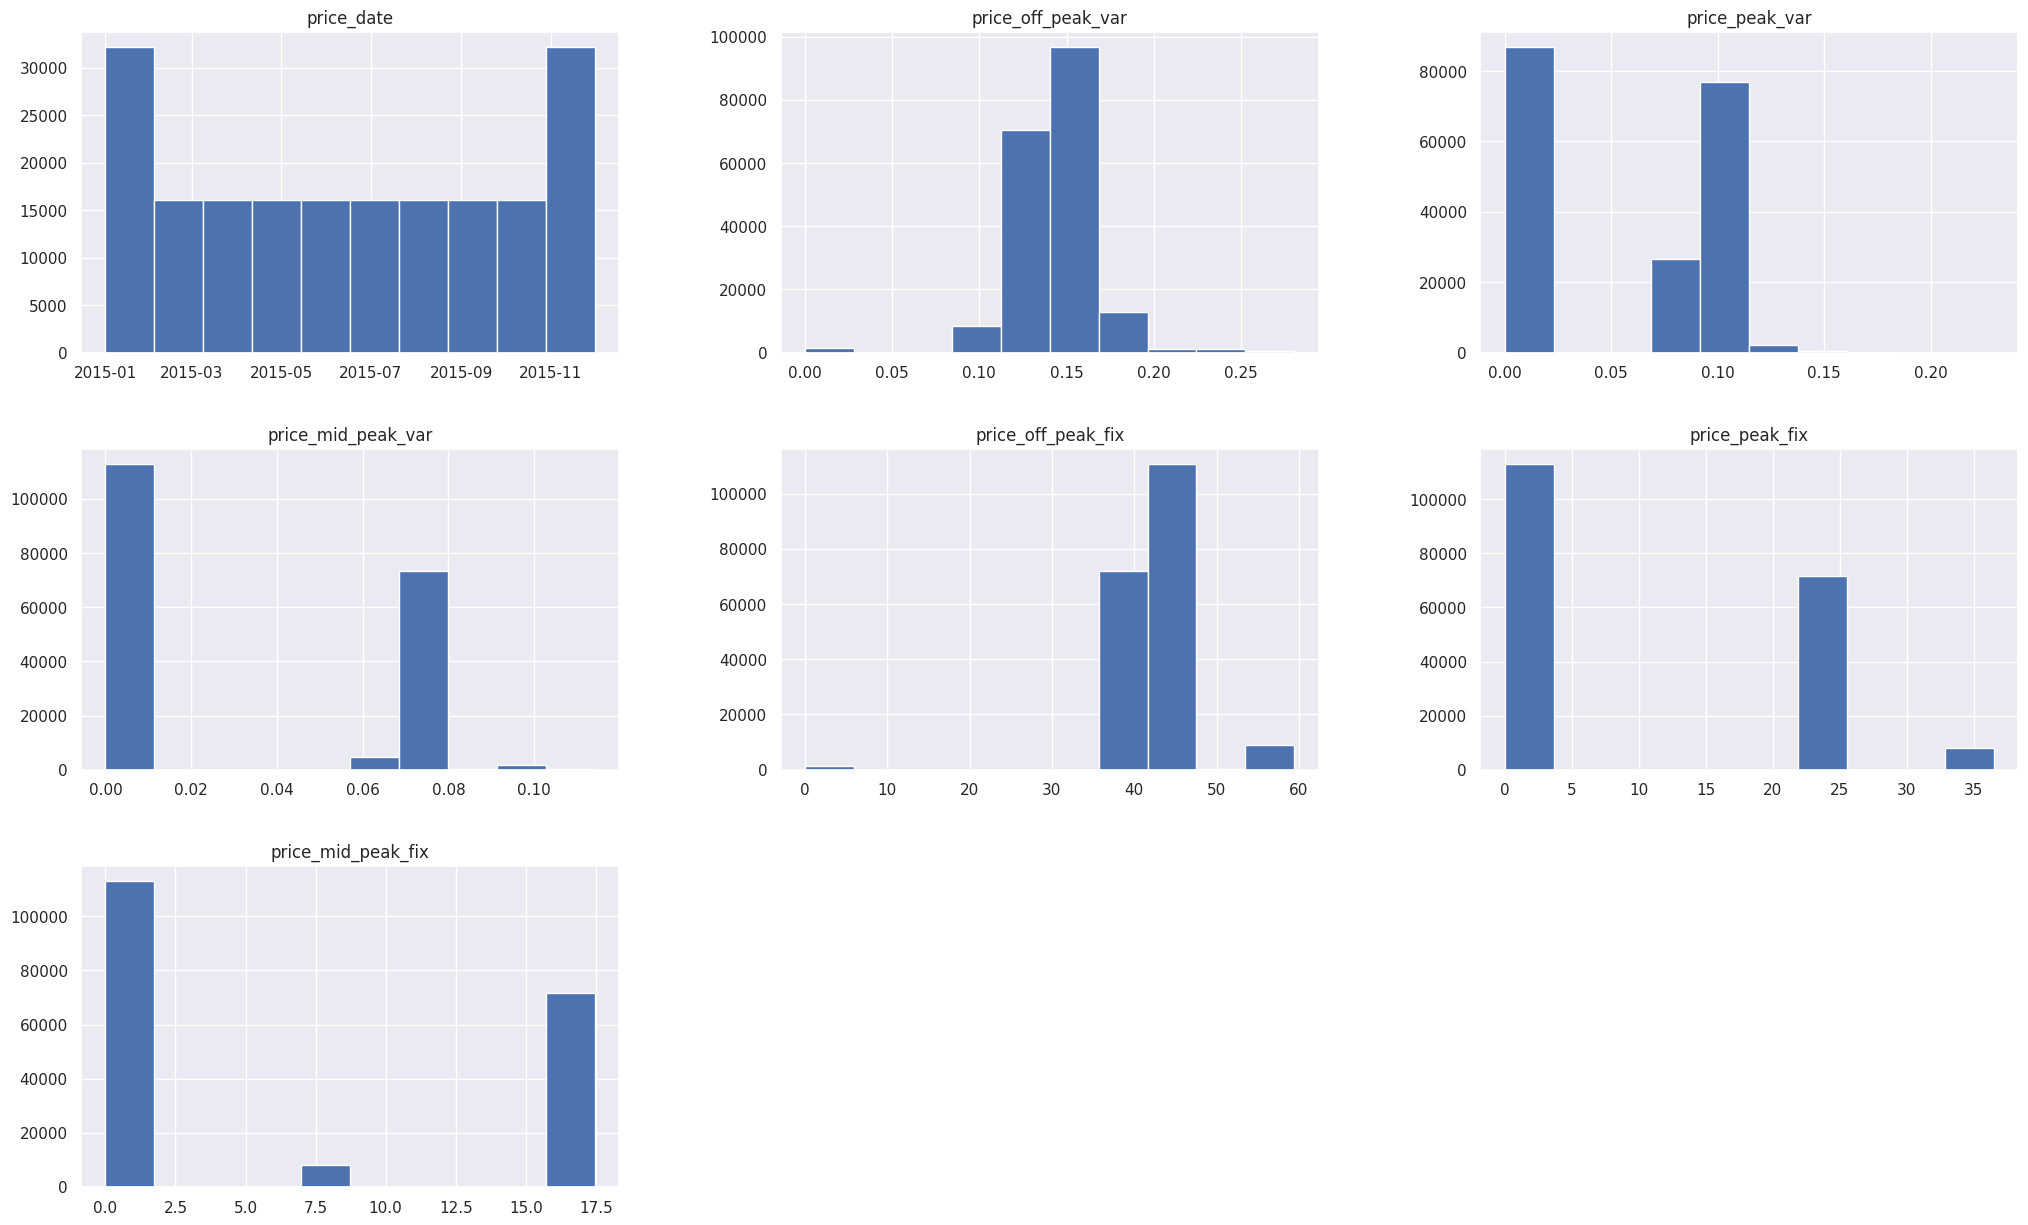

In [120]:
price_df.hist(figsize=(25,15));

## **Calculate Percentage Changes in Consumption and Prices**

In [121]:
#price_df["%change_var_price"].head(10)

In [122]:
past_average_consumption = (client_df["cons_12m"])/12
present_consumption=client_df["imp_cons"]
client_df["%change_cons"]=(((present_consumption-past_average_consumption)/past_average_consumption)*100).where(client_df["cons_12m"]!=0)

In [123]:
price_df.head(20)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [124]:
price_df[["price_off_peak_var","price_peak_var", "price_mid_peak_var"]].min(axis=1)

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
192997    0.076257
192998    0.076257
192999    0.076257
193000    0.076257
193001    0.076257
Length: 193002, dtype: float64

In [128]:
min_price=price_df[["price_off_peak_var","price_peak_var", "price_mid_peak_var"]].min(axis=1)
max_price=price_df[["price_off_peak_var","price_peak_var", "price_mid_peak_var"]].max(axis=1)
price_df["%change_var_price"]=((max_price.where(max_price!=0)-min_price.where(min_price!=0))/min_price.where(min_price!=0))*100

In [130]:
min_price=price_df[['price_off_peak_fix','price_peak_fix', 'price_mid_peak_fix']].min(axis=1)
max_price=price_df[['price_off_peak_fix','price_peak_fix', 'price_mid_peak_fix']].max(axis=1)
price_df["%change_fix_price"]=((max_price.where(max_price!=0)-min_price.where(min_price!=0))/min_price.where(min_price!=0))*100

In [131]:
final_data= pd.merge(client_df, price_df, on="id")
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [137]:
final_data[['%change_var_price','%change_fix_price','%change_cons']].head(50)

,%change_var_price,%change_fix_price,%change_cons
0,76.101543,149.999985,NaN
1,76.101543,149.999985,NaN
2,76.101543,150.000096,NaN
3,76.101543,150.000096,NaN
4,76.101543,150.000096,NaN
5,76.101543,150.000096,NaN
6,70.075670,149.999985,NaN
7,59.144665,149.999985,NaN
8,59.144665,149.999985,NaN
9,59.144665,149.999985,NaN


# PRICE SENSITIVITY

In [138]:
final_data['%change_cons'].head(20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12   -100.0
13   -100.0
14   -100.0
15   -100.0
16   -100.0
17   -100.0
18   -100.0
19   -100.0
Name: %change_cons, dtype: float64

In [139]:
(final_data['%change_cons']/final_data['%change_var_price']).head(60)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48   -1.078780
49   -1.078780
50   -1.078780
51   -1.165980
52   -1.165980
53   -1.165980
54   -1.165980
55   -1.369636
56   -1.369636
57   -1.369636
58   -1.369636
59   -1.369636
dtype: float64

In [140]:
final_data["var_price sensitivity"]=(final_data['%change_cons']/final_data['%change_var_price'])
final_data["var_price sensitivity"].describe()

count    66102.000000
mean        -1.369413
std          0.202688
min         -3.146772
25%         -1.512938
50%         -1.345720
75%         -1.228909
max          1.158195
Name: var_price sensitivity, dtype: float64

In [141]:
final_data["fix_price sensitivity"]=(final_data['%change_cons']/final_data['%change_fix_price'])
final_data["fix_price sensitivity"].describe()

count    65937.000000
mean        -0.602726
std          0.091799
min         -0.693947
25%         -0.659877
50%         -0.613458
75%         -0.590368
max          0.560986
Name: fix_price sensitivity, dtype: float64

In [142]:
final_data["fix_price sensitivity"].head(60)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33         NaN
34         NaN
35         NaN
36         NaN
37         NaN
38         NaN
39         NaN
40         NaN
41         NaN
42         NaN
43         NaN
44         NaN
45         NaN
46         NaN
47         NaN
48   -0.572077
49   -0.572077
50   -0.572077
51   -0.572077
52   -0.572077
53   -0.572077
54   -0.572077
55   -0.572077
56   -0.572077
57   -0.572077
58   -0.572077
59   -0.572077
Name: fix_price sensitivity, dtype: float64

In [143]:
corrMatrix=final_data[["churn","fix_price sensitivity", "var_price sensitivity"]].corr()

<AxesSubplot: >

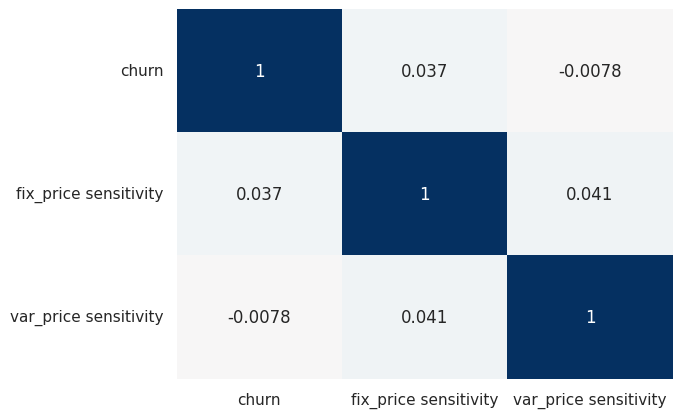

In [144]:
sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True, cmap='RdBu',cbar=False)

**From the correlation plot, it is clear that, price sensitivity has very little correlation with churn**

In [ ]:
#final_data.drop(columns=[ '%change_var_price','%change_fix_price', '%change_cons'], inplace=True)

In [145]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

In [146]:
filename='final_client_df.csv'
final_data.to_csv(filename)